In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
#load the data set to be analyze; the data set is loaded to the object dataframe named 'df' (this is user-defined)
dataSet = pd.read_csv('C:/Users/johnp/Programming/Artificial Intelligence and Machine Learning/Projects/Dataset/student_exam_scores.csv')
df =pd.DataFrame(dataSet)

In [5]:
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [6]:
#you may use the head() to view only the top five rows of the dataframe
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [7]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_studied       200 non-null    float64
 1   sleep_hours         200 non-null    float64
 2   attendance_percent  200 non-null    float64
 3   previous_scores     200 non-null    int64  
 4   exam_score          200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
#remove categorical data
df.drop(columns=["student_id"],inplace=True)

<Axes: >

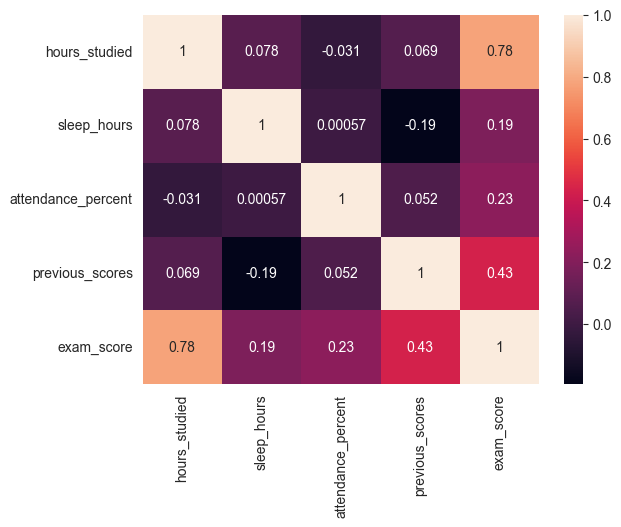

In [14]:
#find the pairwise correlation of all columns in the data frame
#positive values means positive correlation; negative values means negative correlation
#positive correlation --- two variables move in the same direction as one another;
#                         when one variable increases the other variable also increases;
#                         when one variable decreases the other variable also decreases;
#negative correlation --- when one variable increases the other variable decreases;
#                         when one variable decreases the other variable increases;

#df.corr()
sns.heatmap(df.corr(),annot=True)

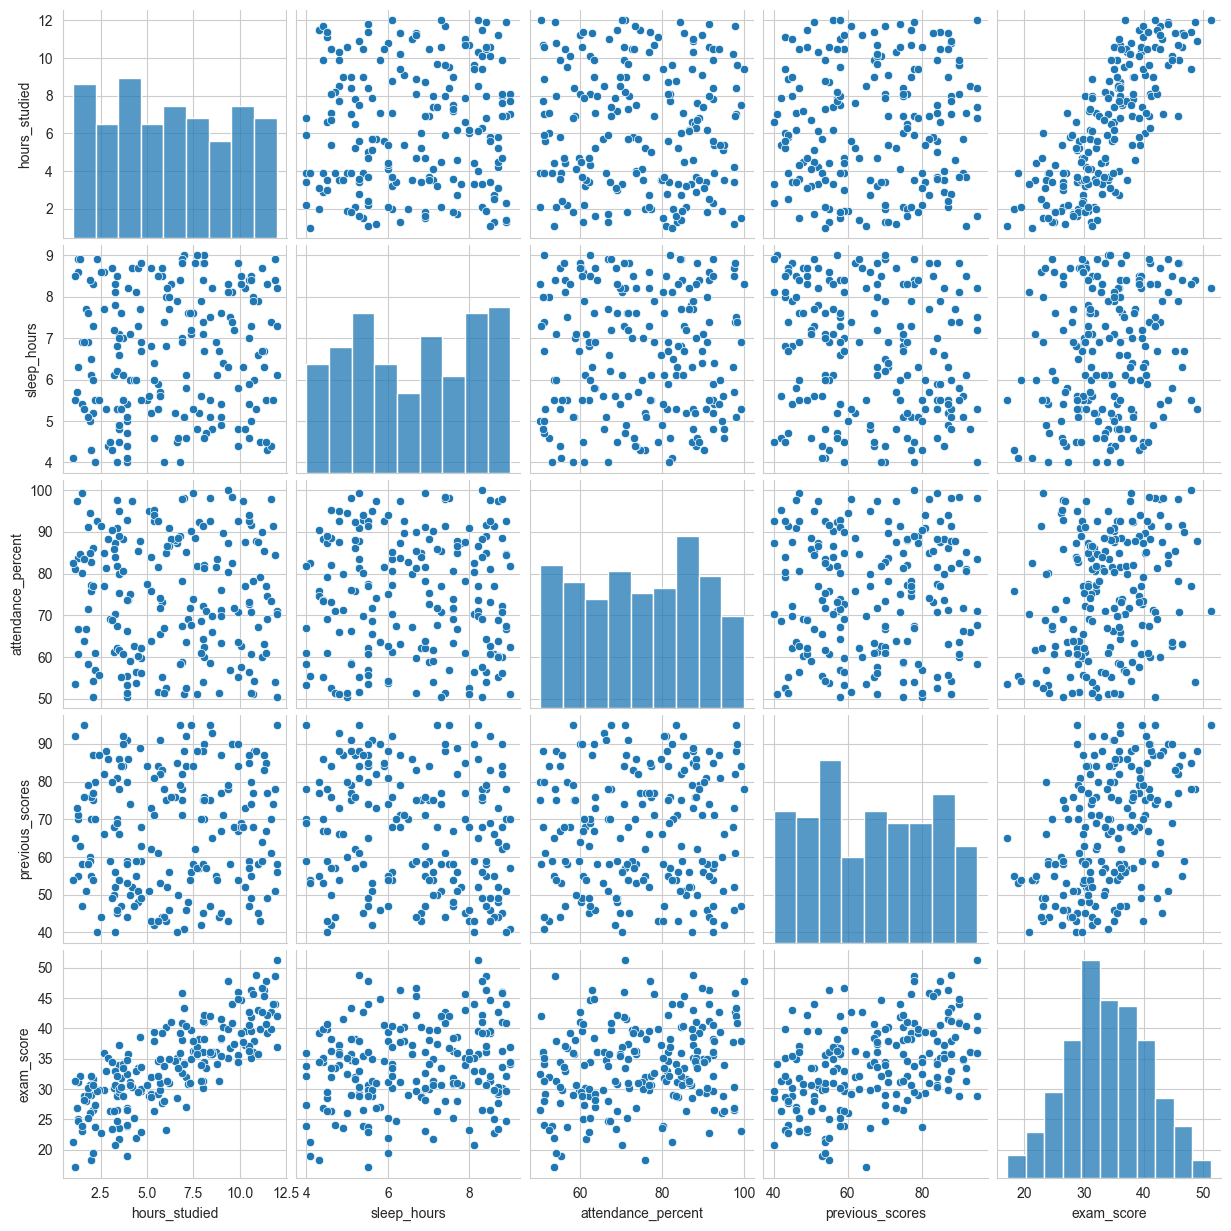

In [15]:
#perform Exploratory Data Analysis using seaborn pairplot
sns.pairplot(df)

In [16]:
print(df.columns)

Index(['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores',
       'exam_score'],
      dtype='object')


In [17]:
x = df.drop(['exam_score'],axis=1)
y = df['exam_score']

In [18]:
x

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,8.0,8.8,72.1,45
1,1.3,8.6,60.7,55
2,4.0,8.2,73.7,86
3,3.5,4.8,95.1,66
4,9.1,6.4,89.8,71
...,...,...,...,...
195,10.5,5.4,94.0,87
196,7.1,6.1,85.1,92
197,1.6,6.9,63.8,76
198,12.0,7.3,50.5,58


In [19]:
y

0      30.2
1      25.0
2      35.8
3      34.0
4      40.3
       ... 
195    42.7
196    40.4
197    28.2
198    42.0
199    37.8
Name: exam_score, Length: 200, dtype: float64

In [21]:
#split the normalized data using 60:40 as the ratio; but note that in model training 80:20 is recommended
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=10)

In [26]:
print("Training set x: ", x_train.shape)
print("Testing set x:", x_test.shape)
print("Training set y: ", y_train.shape)
print("Testing set x:", y_test.shape)

Training set x:  (180, 4)
Testing set x: (20, 4)
Training set y:  (180,)
Testing set x: (20,)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [33]:
#It calculates the coefficients (weights) and the intercept of the regression equation:
lm.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
#get the intercept
intercept = lm.intercept_

#display the Intercept
print (f"Intercept : {intercept: .2f}")

Intercept : -0.86


In [37]:
#get the slope of each independent variable (features)
coeff_df= pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

                    Coefficient
hours_studied          1.516671
sleep_hours            0.854964
attendance_percent     0.106923
previous_scores        0.174569


In [41]:
#Predict house price using the training data
y_pred_train = lm.predict(x_train)
y_pred_train
#print(len(y_pred_train))

array([27.10624888, 29.05348617, 35.45080577, 29.32078788, 37.83751507,
       38.04348148, 26.26116766, 24.55147287, 31.44243923, 34.16825963,
       29.01948743, 35.83882483, 35.7927463 , 36.61363836, 34.11404182,
       36.13126136, 41.14828716, 27.73375452, 31.14929028, 41.61024313,
       32.2929848 , 23.55133601, 28.79925045, 41.91458965, 31.96848744,
       41.94179279, 36.25564746, 42.27689776, 31.75001017, 25.68518304,
       41.68261247, 32.44637317, 31.52840828, 38.76126889, 36.5453982 ,
       43.74520291, 31.14497263, 25.57595188, 24.63425547, 34.36088126,
       30.33791476, 37.51291158, 29.32403327, 45.35036105, 41.7625117 ,
       30.2253966 , 27.63053495, 39.79524587, 28.92233136, 26.52736565,
       44.79717698, 39.12894853, 40.27872683, 30.56121423, 36.47753386,
       28.94296224, 44.93783001, 29.70355181, 36.21641094, 26.14273586,
       32.31034663, 28.66917358, 34.96511428, 45.62267993, 42.74121454,
       29.8116524 , 43.58389612, 37.3990808 , 35.02426745, 32.28

In [42]:
print (y_pred_train[0])

27.10624887777424


In [43]:
y_pred_test = lm.predict(x_test)
y_pred_test

array([34.01499606, 35.58361329, 43.89756538, 39.10149343, 25.94483133,
       22.58428808, 27.90671374, 37.21605759, 24.458339  , 35.10613467,
       40.71046067, 32.68296789, 28.76941585, 23.73165225, 22.41617937,
       39.42295428, 39.60507564, 29.71486792, 32.38569543, 26.17073839])

In [46]:
#Compute and display the predicted against the actual
y_pred_df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred_test, 'Difference': y_test-y_pred_test})
y_pred_df[0:20]

,Actual Score,Predicted Score,Difference
59,29.2,34.014996,-4.814996
5,35.7,35.583613,0.116387
20,46.0,43.897565,2.102435
198,42.0,39.101493,2.898507
52,26.9,25.944831,0.955169
19,17.1,22.584288,-5.484288
162,30.0,27.906714,2.093286
55,37.0,37.216058,-0.216058
69,23.9,24.458339,-0.558339
2,35.8,35.106135,0.693865


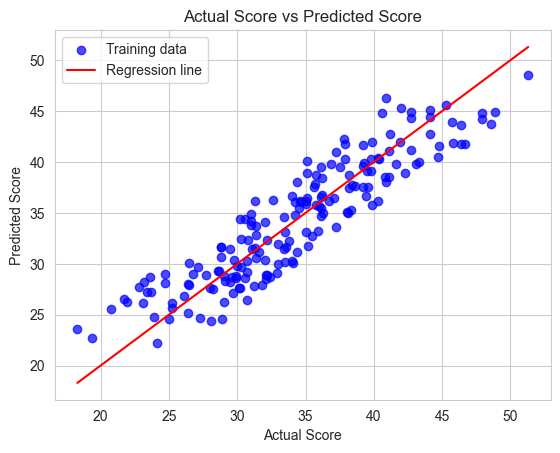

In [51]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_train, label= 'Training data',color='b', alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r', label='Regression line')


plt.legend()
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual Score vs Predicted Score')
plt.show()

In [52]:
from sklearn.metrics import r2_score

print(f"Train R2: { r2_score(y_train, y_pred_train):.2f}")
print(f"Test R2: {r2_score(y_test, y_pred_test):.2f}")

Train R2: 0.83
Test R2: 0.88


<Axes: xlabel='exam_score'>

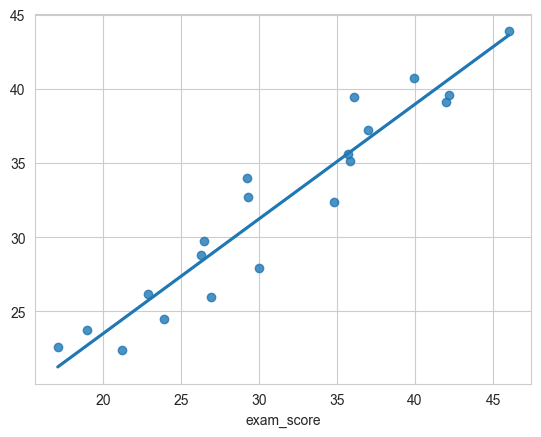

In [56]:
#visualize the price using the testing versus predicted data
#plot a regression line
import seaborn as sns
sns.regplot(x=y_test,y= y_pred_test, ci=None)